In [ ]:
import os

os.makedirs('MyCoolMLProject/data', exist_ok=True)
os.makedirs('MyCoolMLProject/model', exist_ok=True)
os.makedirs('MyCoolMLProject/notebook', exist_ok=True)


### Today rather than relying on scikit learn for the linear regression model in our custom mahcine learning mode, we will make our own linear regression model from scratch

In [ ]:
'''
Steps to create or train a model:-
1. Data Collection (multiple sources like web, sql etc.)
2. Data Preprocessing :- includes changing the datatype, inclusion or exclusion of some columns or rows
3. Feature Engineering:- Collection of data or generation of feature form a given feature
4. Model Training
5. after training then Testing

'''

'\nSteps to create or train a model:-\n1. Data Collection (multiple sources like web, sql etc.)\n2. Data Preprocessing :- includes changing the datatype, inclusion or exclusion of some columns or rows\n3. Feature Engineering:- Collection of data or generation of feature form a given feature\n4. Model Training\n5. after training then Testing\n\n'

Data Set used:-
MEDICAL COST PERSONAL DATASET by Miri Chori

In [ ]:
# Downloading data set directly into the google colab
!pip install kaggle

In [ ]:
import kagglehub

# Download latest version of the data
path = kagglehub.dataset_download('mirichoi0218/insurance')
print(f"Path of the data set file :- {path}") # To get where in google colab is the dataset is being stored


Path of the data set file :- /kaggle/input/insurance


In [123]:
import os
print(os.getcwd())

/content


In [ ]:
import pandas as pd
os.listdir("/kaggle/input/insurance")

['insurance.csv']

In [ ]:
df = pd.read_csv(os.path.join(path, 'insurance.csv'))

In [88]:
# Save the dataframe to your own project directory
df.to_csv('MyCoolMLProject/data/insurance.csv', index=False)

In [ ]:
df.head() # This is to know how the data frame looks like

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info() # To know the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe() # Gives quick statistical summary of the dataframe

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Pre-processing for Model Training

In [116]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split # for splitting traning and testing
import matplotlib.pyplot as plt # This is for plotting the ideal fit line
import seaborn as sns # This is a prettier wrapper over the matpotlib library

In [90]:
# Split dataset before encoding
'''
We split before encoding because with the training set we will train our labelEncoder and with the
testing set we will perform transform on the labelEncoder we have created
'''
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42 )

In [91]:
# Now we will encode our categorical variable
label_encoder = {}
for col in ['sex', 'smoker', 'region']:
  le = LabelEncoder()
  train_df[col] = le.fit_transform(train_df[col])
  test_df[col] = le.transform(test_df[col])
  label_encoder[col] = le

In [92]:
# Features and target
X_train = train_df.drop(columns = ['charges'])
Y_train = train_df['charges']

X_test = test_df.drop(columns = ['charges'])
Y_test = test_df['charges']

In [93]:
print(X_train.head())
print(Y_train.head())

      age  sex    bmi  children  smoker  region
560    46    0  19.95         2       0       1
1285   47    0  24.32         0       0       0
1142   52    0  24.86         0       0       2
969    39    0  34.32         5       0       2
486    54    0  21.47         3       0       1
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64


In [94]:
# Normalise the features to increase the computation calculations
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Assign the scaled result back to X_test
print(X_train)

[[ 0.47222651 -1.0246016  -1.75652513  0.73433626 -0.50874702 -0.45611589]
 [ 0.54331294 -1.0246016  -1.03308239 -0.91119211 -0.50874702 -1.35325561]
 [ 0.8987451  -1.0246016  -0.94368672 -0.91119211 -0.50874702  0.44102382]
 ...
 [ 1.3252637   0.97598911 -0.89153925 -0.91119211 -0.50874702 -1.35325561]
 [-0.16755139 -1.0246016   2.82086429  0.73433626  1.96561348  1.33816354]
 [ 1.1120044   0.97598911 -0.10932713 -0.91119211 -0.50874702  1.33816354]]


Now we will convert this into tensor because the pytorch model does not work with numpy or pandas it only works with tensors

In [95]:
X_train_tensor = torch.tensor(X_train, dtype= torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype= torch.float32).view(-1,1) # This is to flatten it
X_test_tensor = torch.tensor(X_test, dtype= torch.float32) # X_test is now a NumPy array
Y_test_tensor = torch.tensor(Y_test.values, dtype= torch.float32).view(-1,1)  # Values is for getting value not pandas

In [96]:
print(Y_train_tensor.shape)
print(X_test_tensor.shape)

torch.Size([1070, 1])
torch.Size([268, 6])


#### Defining Neural Network

In [97]:
class SimpleNNregression(nn.Module):
  def __init__(self, input_dim):
    super(SimpleNNregression, self).__init__()
    self.network = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 1)
    )

  def forward(self, x):
    return self.network(x)


This makes the blueprint of our model

Now we will use the blueprint to create and initilaise the model

In [98]:
input_dimension = X_train_tensor.shape[1]
model = SimpleNNregression(input_dimension)
print(model)

SimpleNNregression(
  (network): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [99]:
criterion = nn.MSELoss()
optimiser = optim.Adam(model.parameters(), lr = 0.01)

In [100]:
# Training loop
epochs = 33500

for epoch in range(epochs):
  model.train() # model.train() is used to train the model and model.eval() is used to test the model
  optimiser.zero_grad()
  predictions = model(X_train_tensor)
  loss = criterion(predictions, Y_train_tensor)
  loss.backward()

  optimiser.step()

  if (epoch+1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/33500], Loss: 45345040.0000
Epoch [200/33500], Loss: 32617232.0000
Epoch [300/33500], Loss: 30182882.0000
Epoch [400/33500], Loss: 27821516.0000
Epoch [500/33500], Loss: 26364396.0000
Epoch [600/33500], Loss: 25561452.0000
Epoch [700/33500], Loss: 25004682.0000
Epoch [800/33500], Loss: 24476466.0000
Epoch [900/33500], Loss: 24009968.0000
Epoch [1000/33500], Loss: 23625664.0000
Epoch [1100/33500], Loss: 23311248.0000
Epoch [1200/33500], Loss: 23047824.0000
Epoch [1300/33500], Loss: 22829862.0000
Epoch [1400/33500], Loss: 22654984.0000
Epoch [1500/33500], Loss: 22498628.0000
Epoch [1600/33500], Loss: 22285562.0000
Epoch [1700/33500], Loss: 21970194.0000
Epoch [1800/33500], Loss: 21620906.0000
Epoch [1900/33500], Loss: 21350450.0000
Epoch [2000/33500], Loss: 21115522.0000
Epoch [2100/33500], Loss: 20880080.0000
Epoch [2200/33500], Loss: 20653450.0000
Epoch [2300/33500], Loss: 20419146.0000
Epoch [2400/33500], Loss: 20157774.0000
Epoch [2500/33500], Loss: 19936610.0000
Epoch [26

#### Model evaluation

In [117]:
model.eval()
y_pred = model(X_test_tensor).detach().numpy()
y_true = Y_test_tensor.numpy()

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_test_numpy = Y_test_tensor.numpy()

# Claculate metrics
mse = mean_squared_error(y_test_numpy, y_pred)
rmse = mse ** 0.5

mae = mean_absolute_error(y_test_numpy, y_pred)
r2 = r2_score(y_test_numpy, y_pred)

print(f"MSE is:- {mse}")
print(f"RMSE is:- {rmse}")
print(f"MAE is:- {mae}")
print(f"r2 is:- {r2}")

MSE is:- 50607676.0
RMSE is:- 7113.907224584813
MAE is:- 4715.62646484375
r2 is:- 0.6740219593048096


In [103]:
def predict_charges(age, sex, bmi, children, smoker, region):
  input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
               columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

  for col in ['sex', 'smoker', 'region']:
    input_data[col] = label_encoder[col].transform(input_data[col])
  input_data = scaler.transform(input_data)
  input_tensor = torch.tensor(input_data, dtype = torch.float32)


  predicted_charge = model(input_tensor).item()
  return predicted_charge

In [113]:
predicted_value = predict_charges(19, 'female', 27.9, 0, 'yes', 'southwest')

In [114]:
print(f"Predicted insurance charge:-  ${predicted_value:.2f}")

Predicted insurance charge:-  $16753.79


In [106]:
# Save model
torch.save(model.state_dict(), 'MyCoolMLProject/model/trained_model.pt')


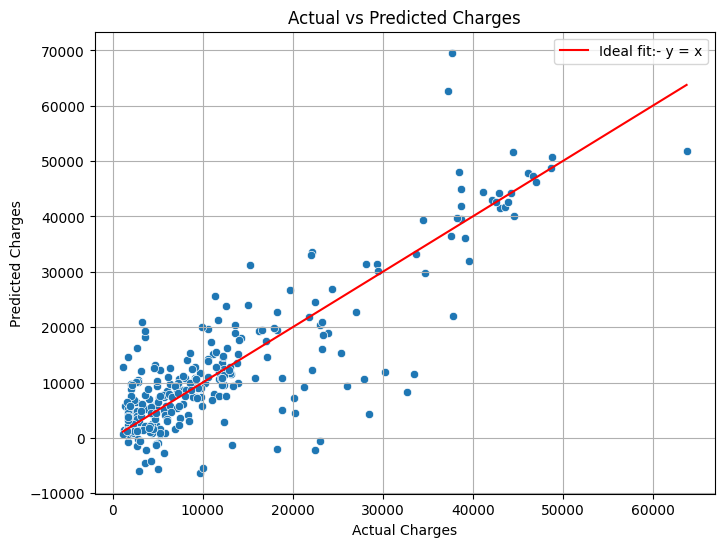

In [119]:
# Plotting a scatter plot with a line y=x for showing how much ideal the trained model is

plt.figure(figsize = (8,6))
sns.scatterplot(x = y_true.flatten(), y = y_pred.flatten())
plt.plot([y_true.min(), y_true.max()], [y_true.min(),y_true.max()], linestyle = '-', color = 'red', label = 'Ideal fit:- y = x')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
import shutil
import os

# Get the current notebook filename
notebook_path = '/content/Insurance_prediction.ipynb'  # Default Colab notebook name

# Check if the notebook file exists before attempting to move it
if os.path.exists(notebook_path):
    # Move the notebook to the notebook folder
    shutil.move(notebook_path, '/content/MyCoolMLProject/notebook/Insurance_prediction.ipynb')
else:
    print(f"Notebook file not found at: {notebook_path}")

Notebook file not found at: /content/Insurance_prediction.ipynb
